In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
from sqlalchemy import create_engine
warnings.filterwarnings('ignore')

In [63]:
# Now we will load the aggregated dataset

engine = create_engine("duckdb:///vendor_inventory.duckdb")


In [85]:
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary WHERE TotalSalesQuantity > 0 AND GrossProfit > 0 AND ProfitMargin > 0", engine)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8564.0,10107.074965,17635.714818,2.000000,3664.000000,7153.000000,9552.000000,2.013590e+05
Brand,8564.0,17614.670131,12946.130933,58.000000,5375.750000,17606.000000,24935.250000,9.063100e+04
PurchasePrice,8564.0,21.780897,81.189624,0.360000,6.660000,10.060000,17.850000,3.352930e+03
ActualPrice,8564.0,32.297467,112.420744,0.490000,9.990000,14.990000,25.990000,4.559990e+03
Volume,8564.0,864.332263,724.240079,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchasedQuantity,8564.0,3772.008991,12276.960631,1.000000,42.000000,431.000000,2666.750000,3.376600e+05
TotalPurchasedDollars,8564.0,35887.253324,136722.999153,0.710000,546.187500,5018.400000,26610.177500,3.811252e+06
TotalSalesQuantity,8564.0,3748.983419,12125.696083,1.000000,62.000000,490.500000,2675.000000,3.349390e+05
TotalSalesDollars,8564.0,51542.278077,186071.489729,1.980000,1355.580000,8483.780000,40622.112500,5.101920e+06
TotalSalesPrice,8564.0,22759.270732,49305.274018,0.990000,584.790000,4549.755000,22595.252500,6.728193e+05


In [86]:

df = pd.read_sql_query("SELECT * FROM vendor_sales_summary WHERE TotalSalesDollars > 0 ORDER BY TotalSalesDollars", engine)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchasedQuantity,TotalPurchasedDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
1,4425,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,4.99,750.0,1,3.37,1.0,4.99,4.99,0.11,144929.24,1.62,32.464930,1.000000,1.480712
2,8673,STE MICHELLE WINE ESTATES,13344,Columbia Crest Two Vines Rsl,3.57,5.29,1500.0,1,3.57,1.0,5.29,5.29,0.22,15919.70,1.72,32.514178,1.000000,1.481793
3,5612,MILTONS DISTRIBUTING CO,17675,Albero Sparkling Wh Organic,4.14,6.29,750.0,1,4.14,1.0,5.79,5.79,0.11,9.46,1.65,28.497409,1.000000,1.398551
4,9815,WINE GROUP INC,26950,Firefly Ridge Chard,3.99,5.79,750.0,1,3.99,1.0,5.79,5.79,0.11,27100.41,1.80,31.088083,1.000000,1.451128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
10510,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
10511,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
10512,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830


In [87]:
# Lets create a summary table for the entire data in the table

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10514.0,10600.166255,18661.457769,2.000000,3924.000000,7153.000000,9552.000000,2.013590e+05
Brand,10514.0,17975.340784,12689.342924,58.000000,5716.750000,18644.000000,25465.750000,9.063100e+04
PurchasePrice,10514.0,23.409368,92.170052,0.360000,6.840000,10.450000,19.370000,4.264700e+03
ActualPrice,10514.0,34.340224,126.674964,0.490000,10.990000,15.990000,28.990000,5.799990e+03
Volume,10514.0,847.736732,667.959671,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchasedQuantity,10514.0,3192.852007,11181.338139,1.000000,36.000000,280.500000,2028.750000,3.376600e+05
TotalPurchasedDollars,10514.0,30589.555058,124047.851341,0.710000,479.362500,3836.415000,21280.710000,3.811252e+06
TotalSalesQuantity,10514.0,3129.583317,11037.801407,1.000000,36.000000,280.000000,1985.000000,3.349390e+05
TotalSalesDollars,10514.0,42954.173834,168977.755843,1.980000,809.820000,5599.700000,29524.250000,5.101920e+06
TotalSalesPrice,10514.0,19111.958773,45264.605387,0.990000,334.890000,3020.085000,16442.477500,6.728193e+05


In [88]:
# Lets catch hold of the columns from the dataset

numerical_cols = df.select_dtypes(include=np.number).columns

<function matplotlib.pyplot.show(close=None, block=None)>

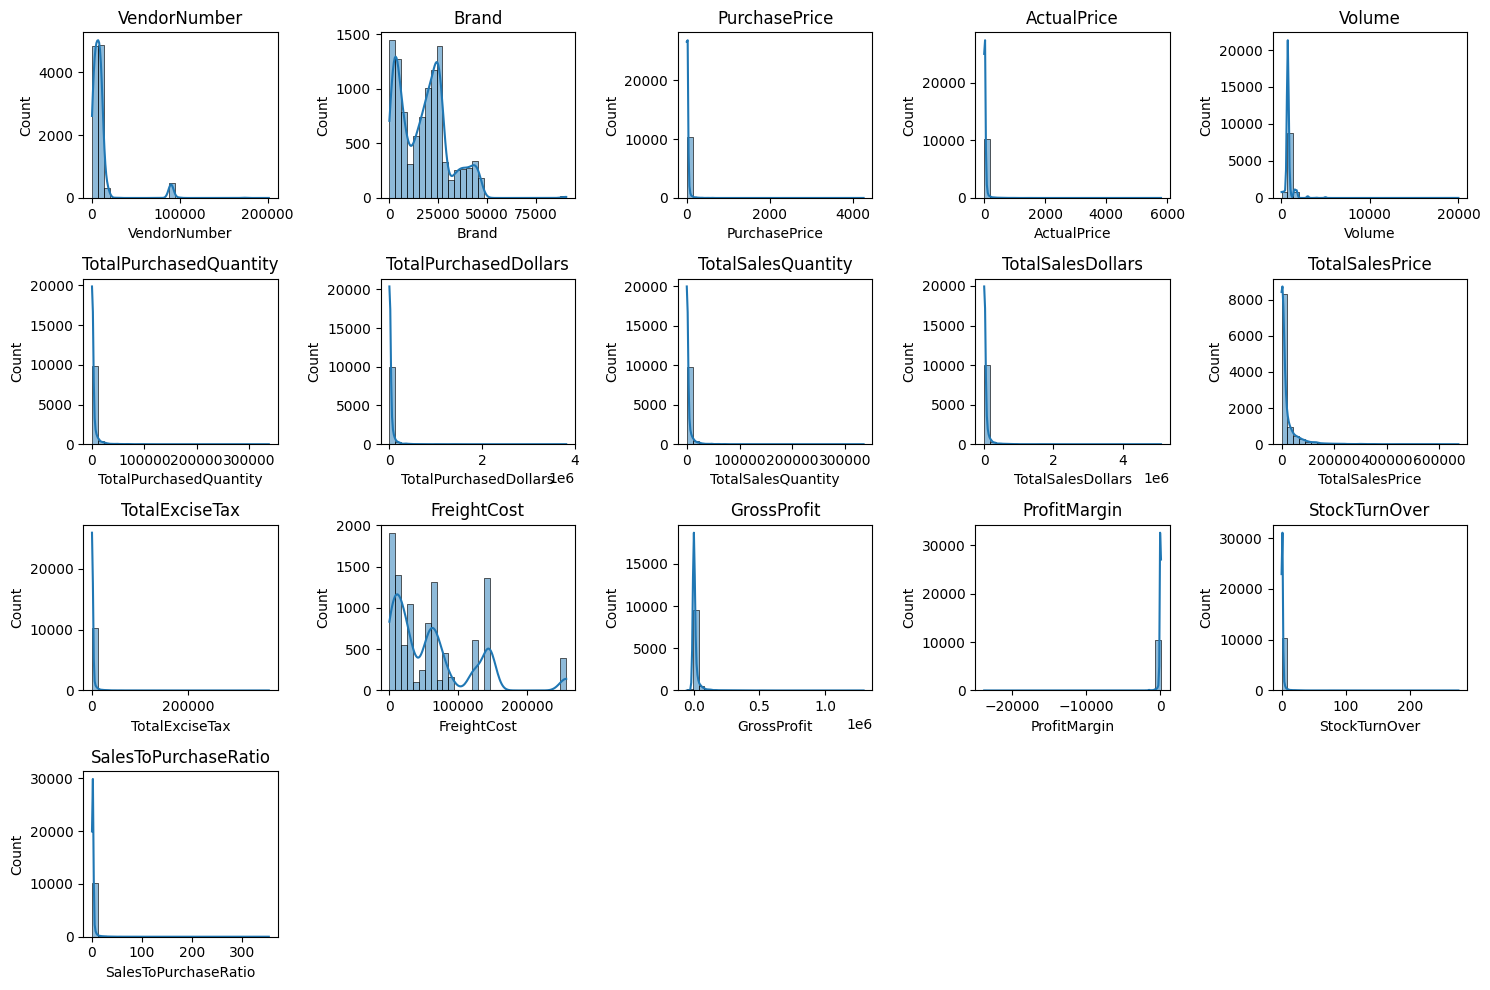

In [89]:
# Lets create a histogram

plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,5,i+1)
    sns.histplot(df[col], kde=True, bins=30)

    plt.title(col)
plt.tight_layout()
plt.show

From the histogram we can deduce following insights:
1. Majority of the metrics are Right-Skewed. Which means these columns have more number of low values.
2. Only the profit-margin metric is left_skewed. Which means this column has more number of high values.
3. FreightCost and Brand are multimodal.

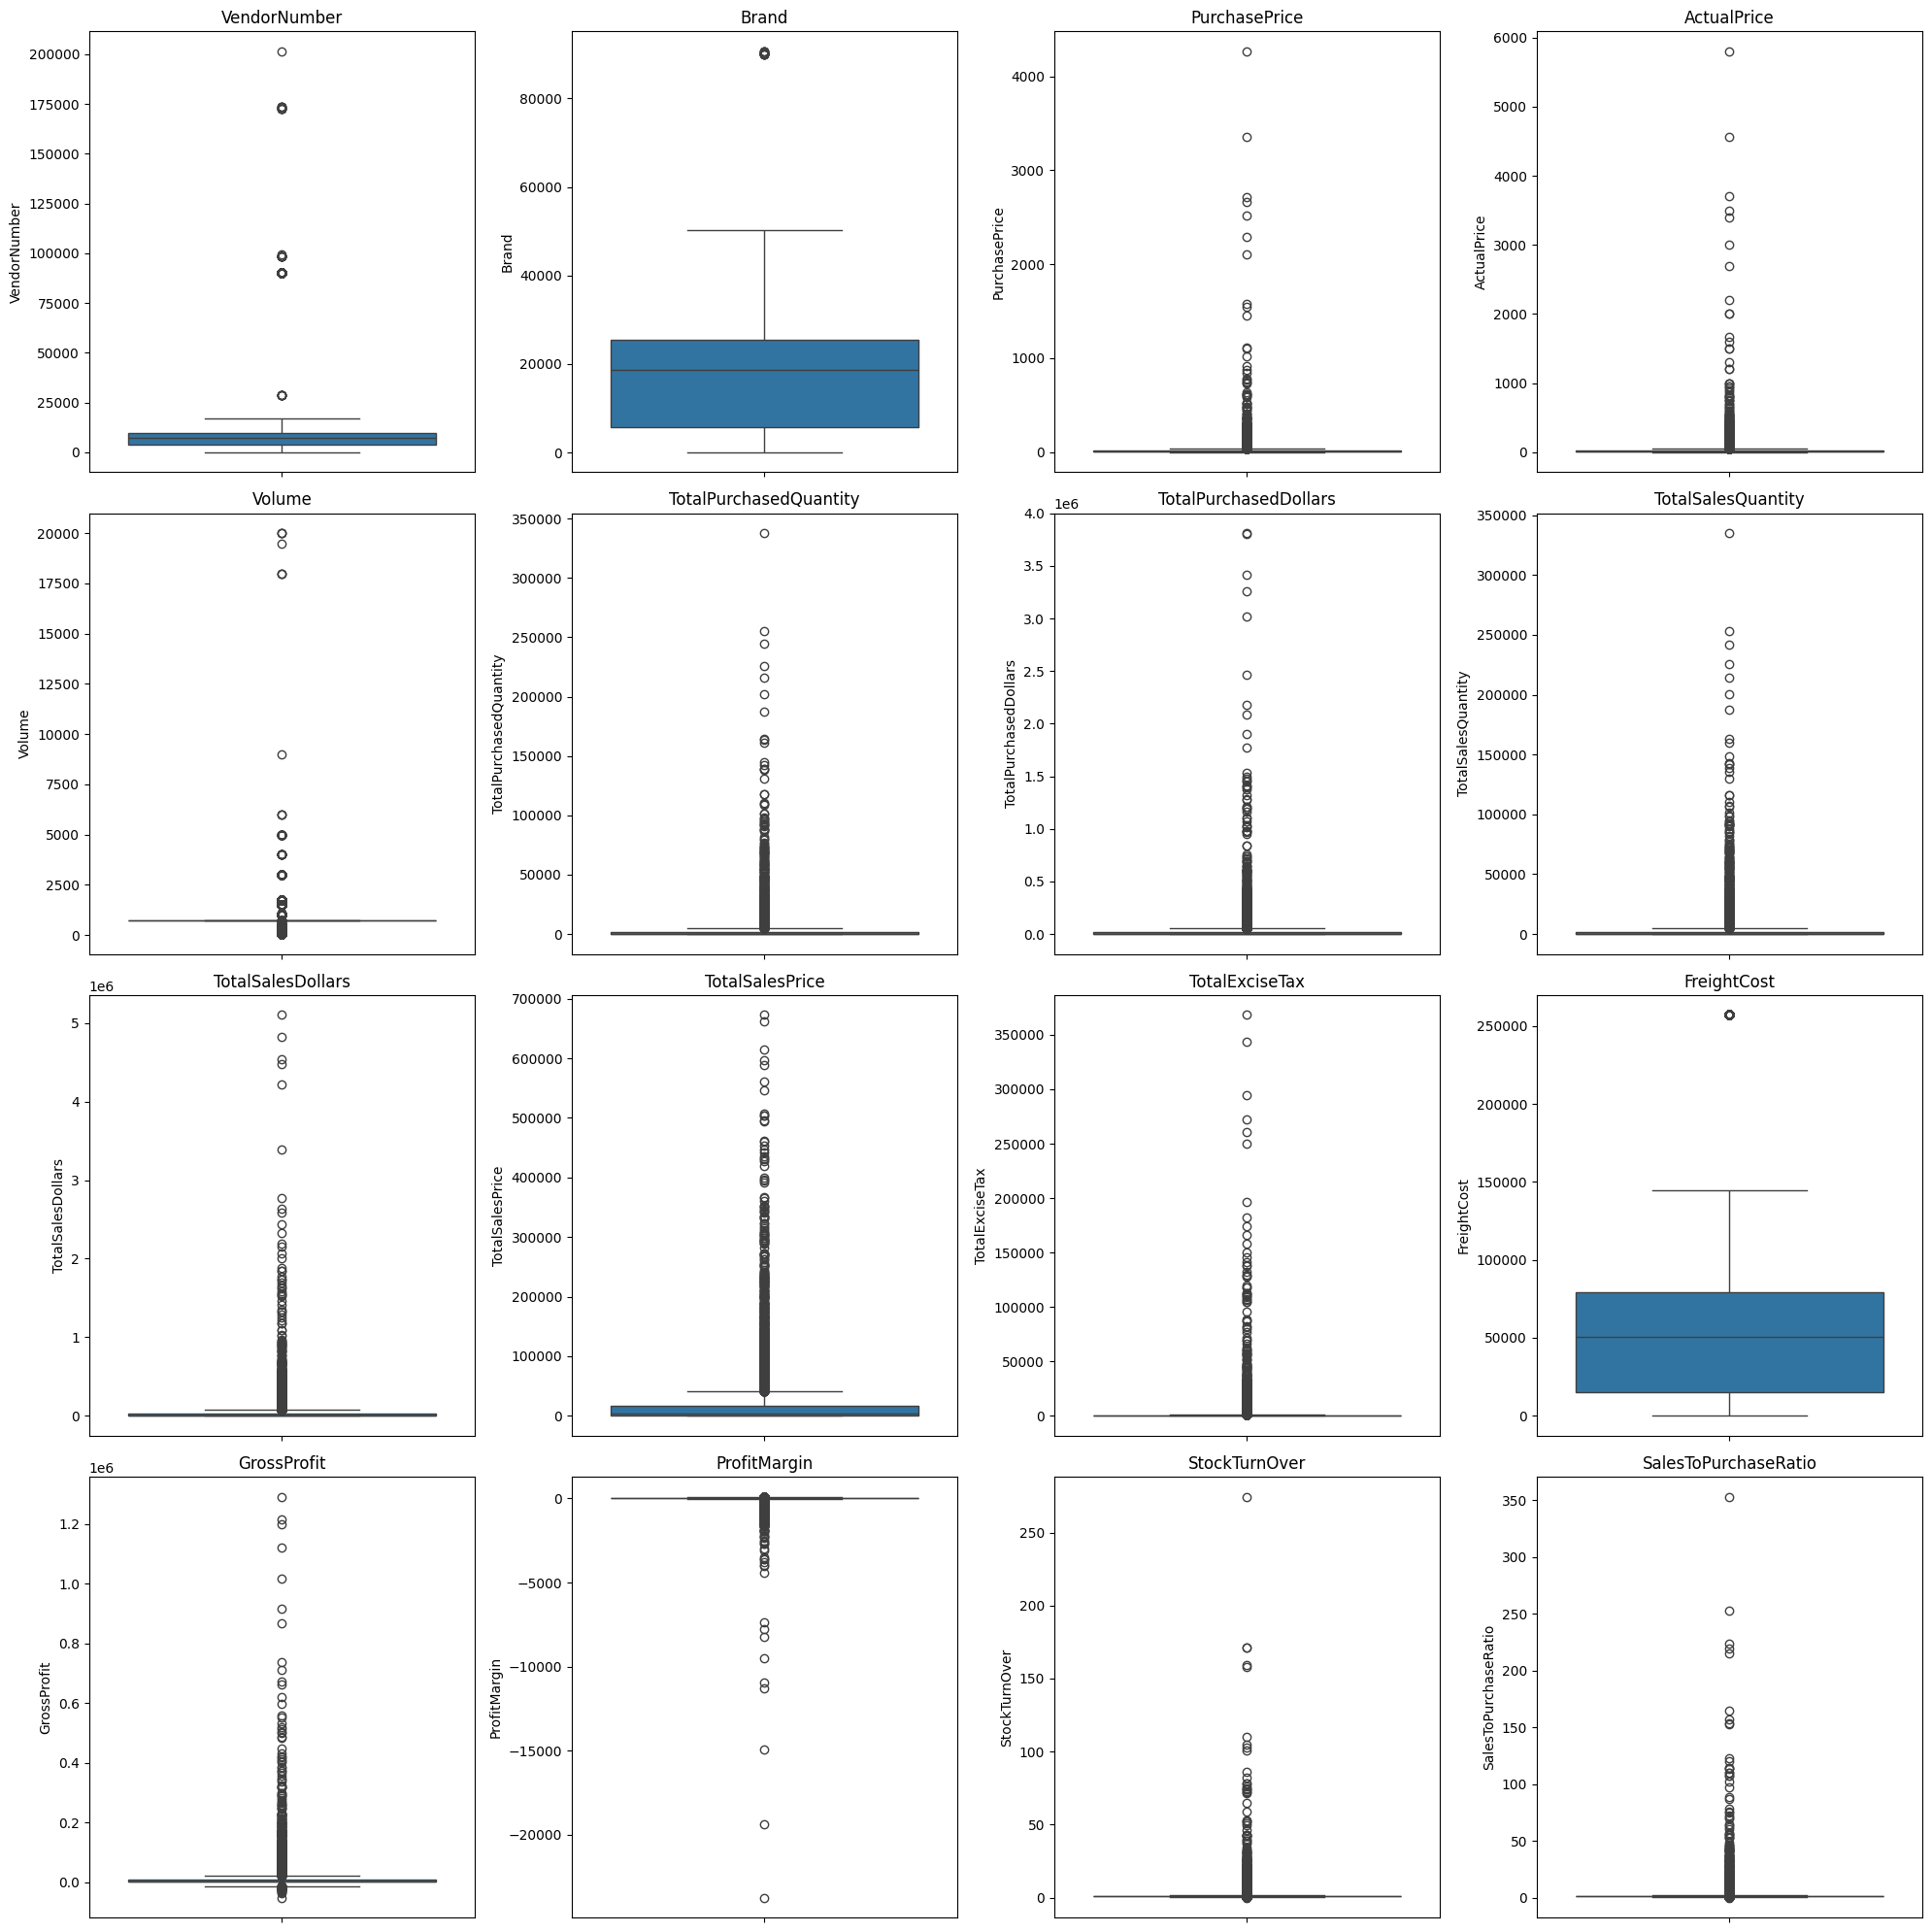

In [90]:
 # Plotting a box plot

plt.figure(figsize = (20,20))

for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Insights
- Each column has a great number of outliers but we cannot just blindly eliminate them.
- The boxplot of GrossProfit has values below the bottom line which means there are negative values which means there are losses in the business with respect to certain vendors.
- In the boxplots of TotalPurchasedDollars, Colume, ActualPrice we can see single point outliers that can possibly mean high value brands which are expensive. We cannot eliminate them.
- FreightCost: Range is (0.09, 257032.07) which means there are inefficiencies or bulk shipments.
- StockTurnOver: Range is (0.00, 274.5) which means some stock are turned very soon while others remain in stock indefinitely. 

In [91]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchasedQuantity,TotalPurchasedDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
1,4425,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,4.99,750.0,1,3.37,1.0,4.99,4.99,0.11,144929.24,1.62,32.464930,1.000000,1.480712
2,8673,STE MICHELLE WINE ESTATES,13344,Columbia Crest Two Vines Rsl,3.57,5.29,1500.0,1,3.57,1.0,5.29,5.29,0.22,15919.70,1.72,32.514178,1.000000,1.481793
3,5612,MILTONS DISTRIBUTING CO,17675,Albero Sparkling Wh Organic,4.14,6.29,750.0,1,4.14,1.0,5.79,5.79,0.11,9.46,1.65,28.497409,1.000000,1.398551
4,9815,WINE GROUP INC,26950,Firefly Ridge Chard,3.99,5.79,750.0,1,3.99,1.0,5.79,5.79,0.11,27100.41,1.80,31.088083,1.000000,1.451128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
10510,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
10511,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
10512,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830


In [92]:
# We will eliminate the negative outliers from Gross profit, ProfitMargin and TotalSalesQuantity

df = pd.read_sql_query("SELECT * FROM vendor_sales_summary WHERE GrossProfit > 0 AND ProfitMargin > 0 AND TotalSalesQuantity > 0", engine)


<function matplotlib.pyplot.show(close=None, block=None)>

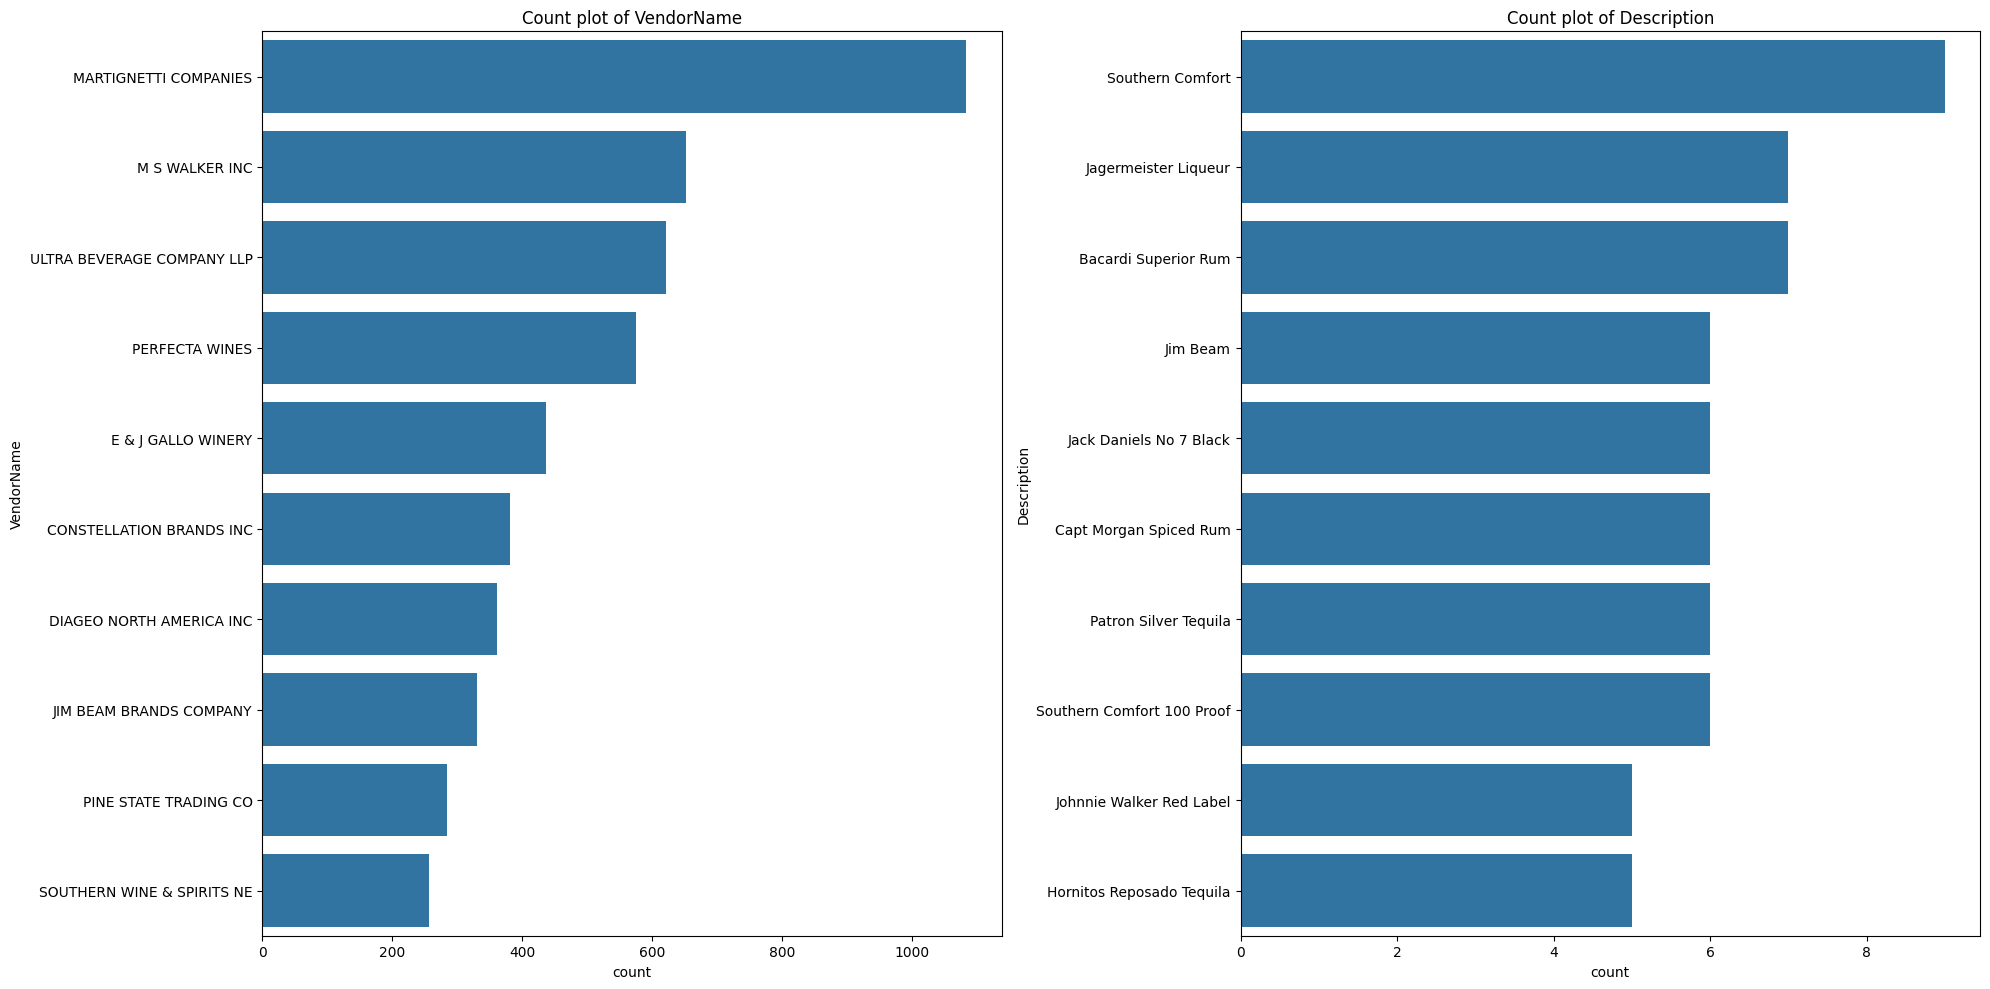

In [93]:
# Now we will determine which vendor and product hold most of the data. We use CountPLot for that.

categorical_cols = ["VendorName", "Description"]

plt.figure(figsize = (20,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show

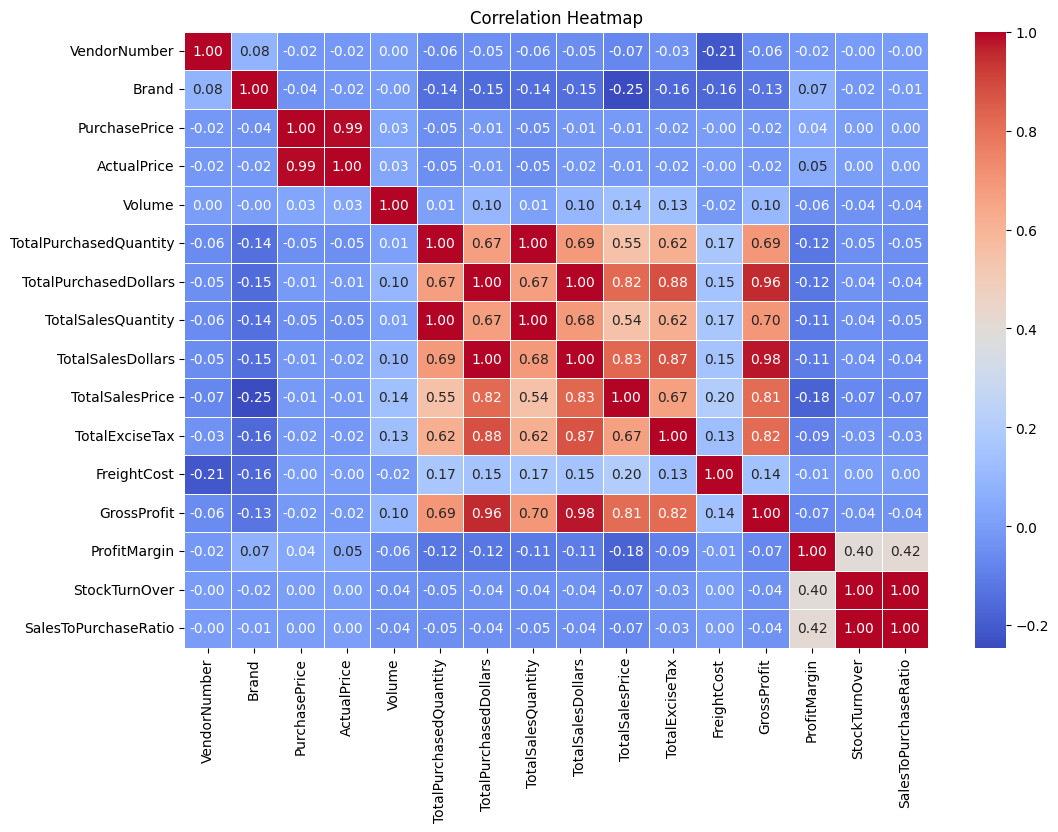

In [94]:
# Now we will create a correlation heatmap

plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## INSIGHTS FROM THE HEATMAP


**Correlation Heatmap**
- PurchasePrice has weak correlations with TotalSalesDollars(-0.01) and GrossProfit(-0.016). This suggests that price variations do not significantly impact sales revenue or profit.
- Strong Correlation between total purchase quantity and total sales quantity (0.999). Confirming efficient inventory turnover.
- Negative correlation between profit Margin and total sales price (-0.18). This suggests that as sales price increases, margin decrease, possibly due to competative prcing pressures.
- StockTurnover has weak correlation with both GrossProfit(-0.038) and ProfitMargin(-0.055), indicating the fact that faster turnover does not necessarily result in higher profitability.

# **DATA ANALYSIS**

### **Identify brands who needs promotional or pricing adjustments which exibit lower sales performance but higher profit margins.**

Which means we are required to find descriptions[brands] which are sold less but give more profit. For that we are required to find the threshold sales performance value and mean profit margin.

Threshold for sales → because sales are skewed and need a cut-off to define “low.”

Mean for profit margin → because it’s a bounded ratio, mean works well as a benchmark for “good.”

In [95]:
# First we will aggregate the brands to get there totalSalesdollars and their average profitmargins

brand_performance = df.groupby('Description').agg({'TotalSalesDollars':'sum', 'ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [96]:
# Lets determine the sales threshold and the average profit margin

low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)


In [97]:
low_sales_threshold

np.float64(560.2989999999999)

In [98]:
high_margin_threshold

np.float64(64.97017552750113)

In [99]:
target_brands = brand_performance[(brand_performance['TotalSalesDollars'] <= low_sales_threshold) & (brand_performance['ProfitMargin'] >= high_margin_threshold)]

In [100]:
print("Brands with low sales but high profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [101]:
# For better understanding of the data

brand_performance = brand_performance[brand_performance['TotalSalesDollars']<1000]

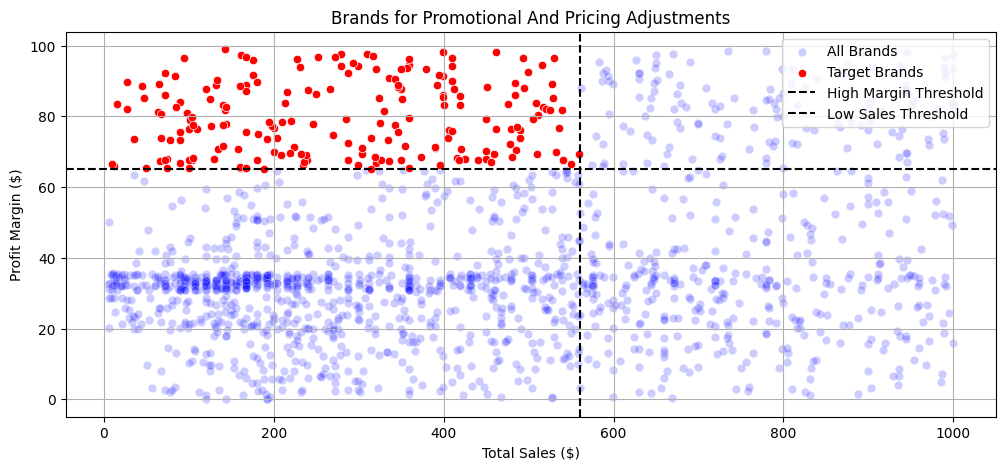

In [102]:
# Lets plot a scatter plot to show the target brands on the chart.

plt.figure(figsize = (12,5))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y="ProfitMargin", color='Blue', label='All Brands', alpha=0.2)
sns.scatterplot(target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle="--", color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle="--", color='black', label='Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel("Profit Margin ($)")
plt.title("Brands for Promotional And Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

### THE RED COLOR ONES ARE OUR TARGET VALUES

### **Which vendors and brands demostrate the highest sales performance.**



In [103]:
# First lets capture the top vendors and brands.

top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [104]:
# Formatting numbers function 
def format_dollars(value):
    '''This function is used to format the numbers in some readable numbers.'''
    try:
        value = float(value)
    except (ValueError, TypeError):
        return value
    
    if value >= 1_000_000:
        return f"{value / 1_000_000 :.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000 :.2f}K"
    else:
        return str(value)

In [105]:
top_vendors.apply(lambda x : format_dollars(x)) 
# The above line is only used to apply functions when some additional arguments are to be passed inside.

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

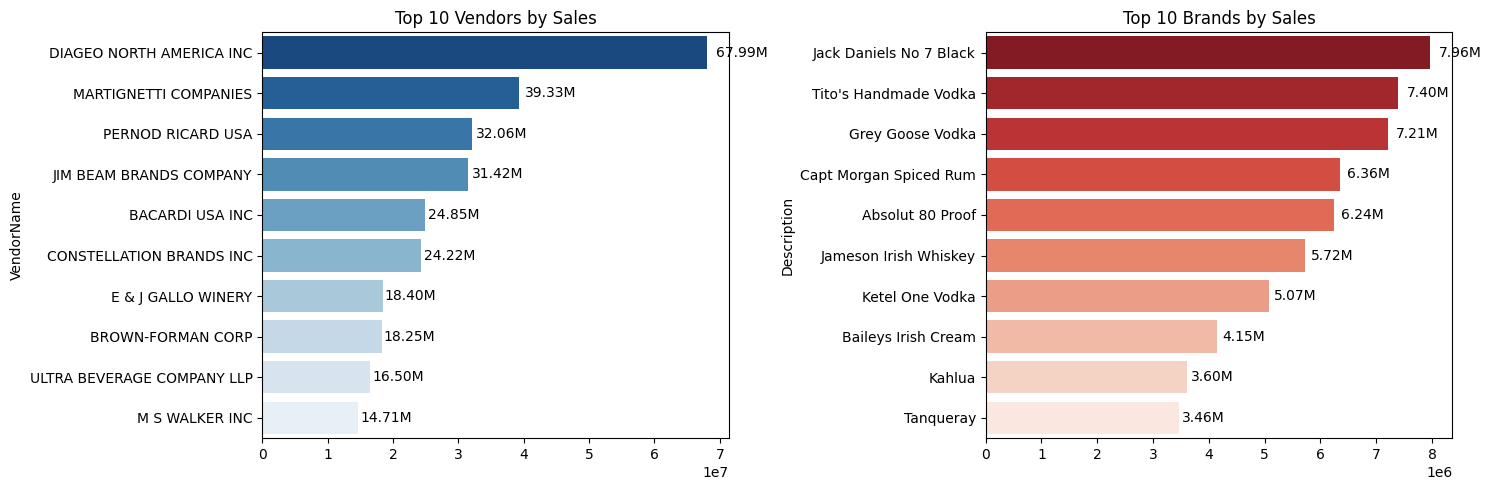

In [106]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize = 10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize = 10, color='black')

plt.tight_layout()
plt.show()


### **Which vendors contribute most to total purchase dollars**


In [107]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchasedDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [108]:
# Creating a performance measure

vendor_performance['Purchase_Contribution%'] = vendor_performance['TotalPurchasedDollars'] / vendor_performance['TotalPurchasedDollars'].sum()
vendor_performance

,VendorName,TotalPurchasedDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000001
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.000084
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.000038
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000003
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.000340
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13,0.000139
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.000971
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,0.019121
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28,0.016932


In [109]:
# Convert fractions to percentages if needed
vendor_performance.loc[vendor_performance['Purchase_Contribution%'] < 1, 'Purchase_Contribution%'] *= 100

# Sort and round
vendor_performance = vendor_performance.sort_values('Purchase_Contribution%', ascending=False).round(2)


In [110]:
# We will apply the filter on the columns on the table

top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchasedDollars'] = top_vendors['TotalPurchasedDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

top_vendors

,VendorName,TotalPurchasedDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [111]:
top_vendors['Purchase_Contribution%'].sum()

np.float64(65.69000000000001)

**This shows that the top 10 vendors covers 66% of the total contribution to the entire TotalPurchasedDollars of the target_brands. Which means majority of the brands are either making the purchases very inconsistently or in very less amounts.**

**We can show these two requirements using a PERETO chart which shows a bar chart and a cumulative graph**

In [112]:
# Cumulative contribution calculation

top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()

top_vendors

,VendorName,TotalPurchasedDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


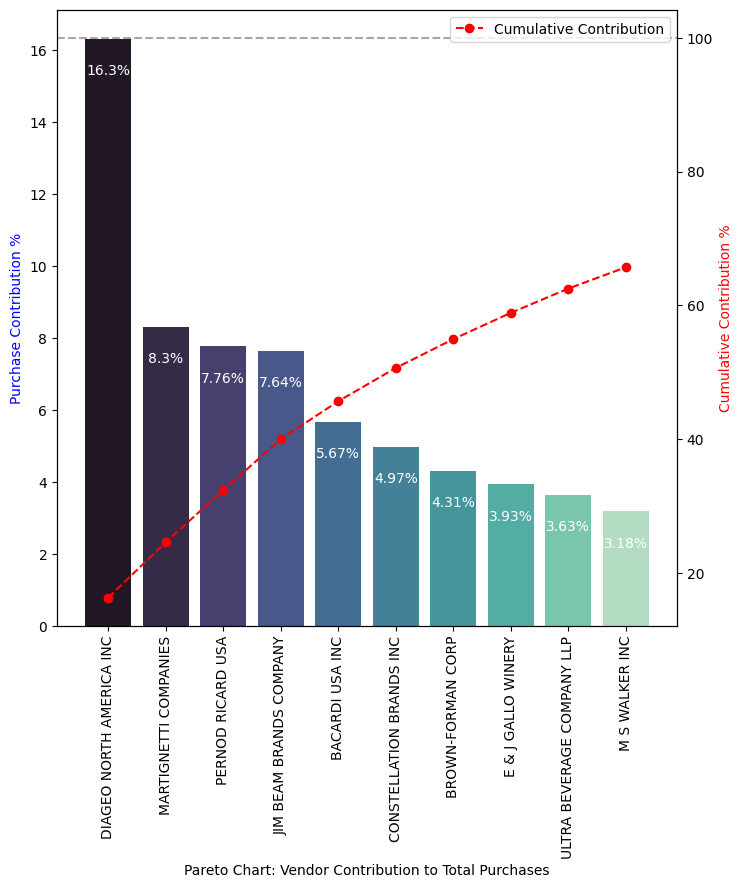

In [113]:
fig, ax1 = plt.subplots(figsize=(8,8))

# Bar plot for Purchase Contributions%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# line plot for cumulative contributions%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='grey', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show() 

### **How much of the total procurement is dependent on the top vendors.**

In [114]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 65.69 %


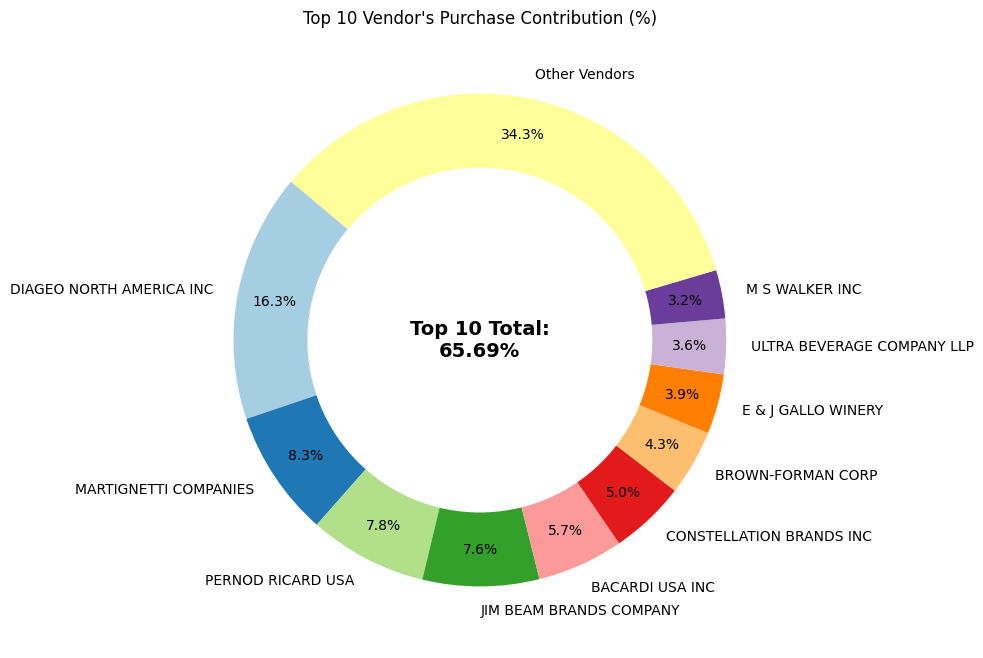

In [115]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contributions = sum(purchase_contributions)
remaining_contribution = 100 - total_contributions

# Append 'Other Vendors' category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a 'Donut' look
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Add total contribbution annotation in the center
plt.text(0,0, f"Top 10 Total:\n{total_contributions:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

### **Does Purchasing in BULK reduce the unit price, and what is the optimal purchase volume for cost savings ?**

In [116]:
df['UnitPurchasePrice'] = df['TotalPurchasedDollars'] / df['TotalPurchasedQuantity']

In [117]:
df["OrderSize"] = pd.qcut(df['TotalPurchasedQuantity'], q=3, labels=['Small', 'Medium', 'Large']) #quantile_cut

In [118]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


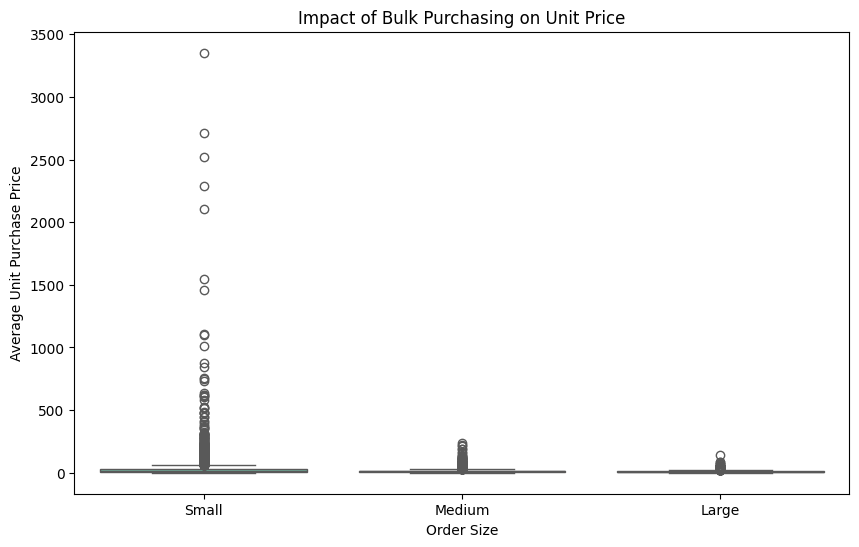

In [119]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette='Set2')
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

The insights that we can gather from the plot are:
- Vendors buing in bulk get the lowest unit price meaning higher margins if they can manage inventory efficiently.
- The price difference between small and large orders is substantial ( ~72% reduction in unit cost )
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

### **Which vendors have low inventory turnover, indicating excess sock and slow-moving products**

In [120]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver', ascending = True).head(10)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


### **How much capital is locked in unsold inventory per vendor and which vendors contribute the most to it?**

In [121]:
df["UnsoldInventoryValue"] = (df['TotalPurchasedQuantity'] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2.71M


In [122]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


### **What is the 95% Confidence Intervals for profit margins of top-performing and low-performing vendors.**

In [123]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [124]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [125]:
def confidence_interval(data, confidence=0.95):
    '''This function is used to calculate the confidence interval'''
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error]
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top vendors 95% CI: (30.74, 31.61, Mean:31.18)
Low vendors 95% CI: (40.50, 42.64, Mean:41.57)


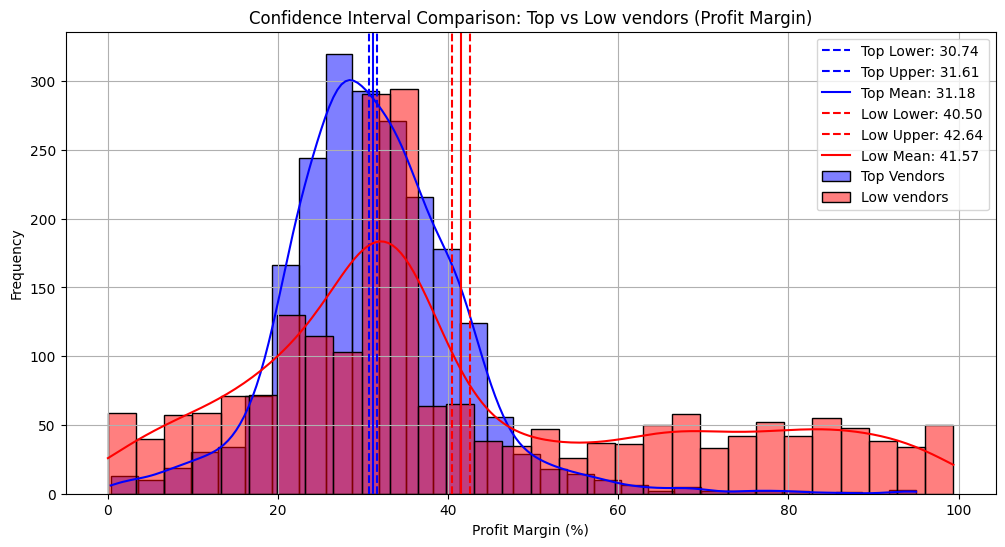

In [126]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}, Mean:{top_mean:.2f})")
print(f"Low vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}, Mean:{low_mean:.2f})")

plt.figure(figsize = (12,6))

# Top vendors plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs Low vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

The insights that we can gain from the resulting plot are:
- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top_performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For high-performing vendors: If they aim to improve profitability, They could explore selective price adjustments, cost optimization or buindling strategies.
- For low-performing vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing or improved distribution strategies. 

### **Is there a significant difference in profit margins between top_performing and low_performing vendors ?**

Hypothesis:

H0: (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
H1: (Alternative Hypothesis): The mean profit margins of top-performing and low_performing vendors are significantly different.

In [127]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform two sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print Results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low performing vendors.")
else: 
    print("Fail to reject H0: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H0: There is a significant difference in profit margins between top and low performing vendors.
